<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/Santiago_Ruiz_km_Agg_Gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

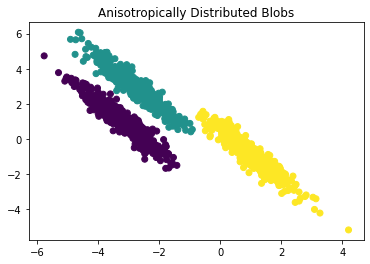

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("Anisotropically Distributed Blobs")
plt.show()

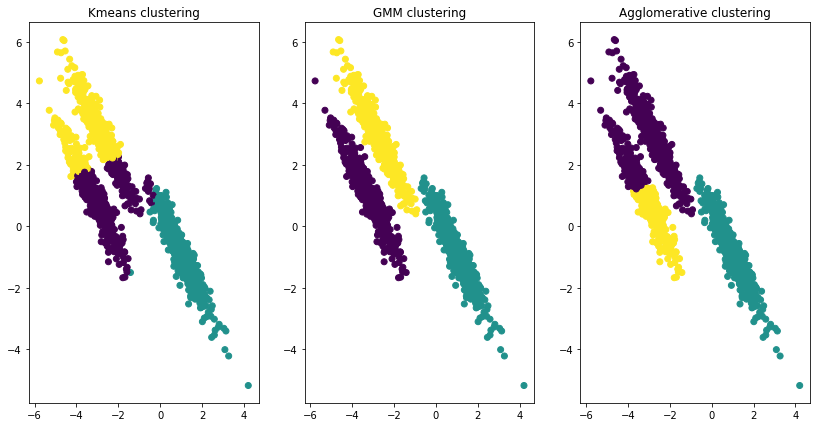

In [18]:
#kmeans
Kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
#agglomerative
Agg_clust = AgglomerativeClustering(n_clusters=3).fit_predict(X_aniso)
#gmm
clust_gmm = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(X_aniso)

plt.figure(figsize=(14,7))
ax0 = plt.subplot(1,3,1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=Kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=Agg_clust)
plt.title("Agglomerative clustering")
plt.show()


